# Link To The Dataset On Kaggle
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/code

# Reading The Data

In [1]:
import pandas as pd
data=pd.read_csv("predictive_maintenance.csv")

In [2]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# Understanding The Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Feature Selection 1

In [5]:
data.drop(["Failure Type","UDI"],inplace=True,axis=1)

# Check Nulls

In [6]:
data.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

# Check Dublicated

In [7]:
data.duplicated().sum()

np.int64(0)

# Outlayers

In [8]:
for i in data.columns:
    if(data[i].dtype in ["int64","float64"]):
        print(i)
        print(data[i].describe())

Air temperature [K]
count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64
Process temperature [K]
count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64
Rotational speed [rpm]
count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64
Torque [Nm]
count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64
Tool wear [min]
count    10000.000000
mean       1

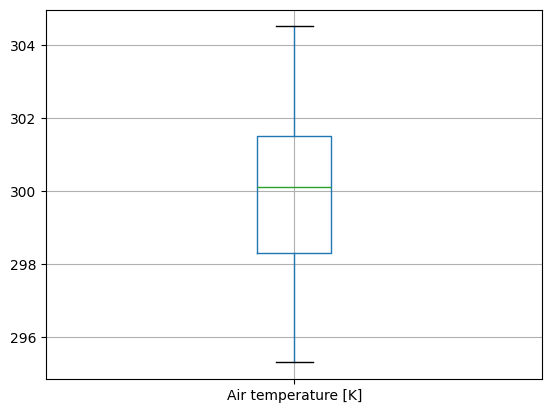

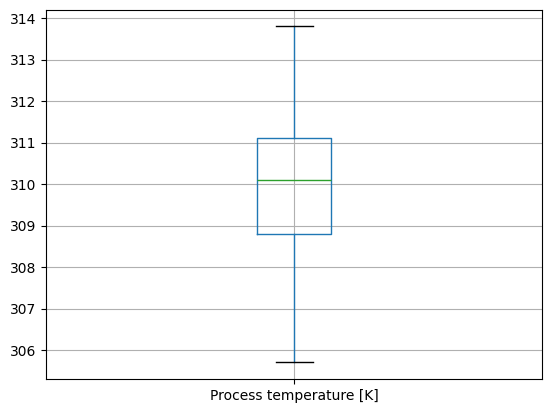

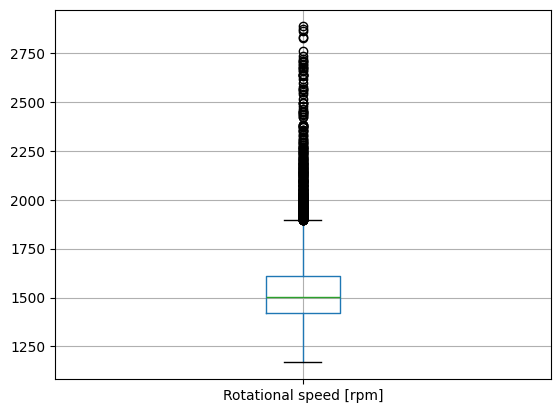

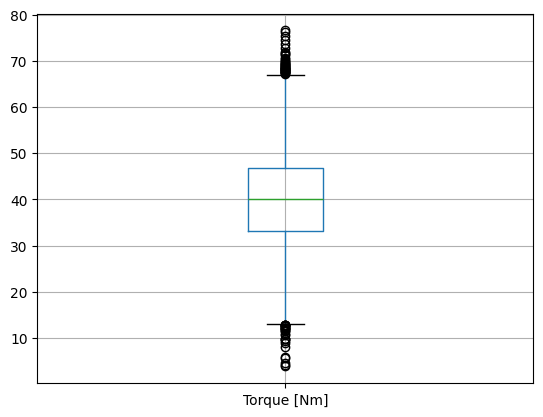

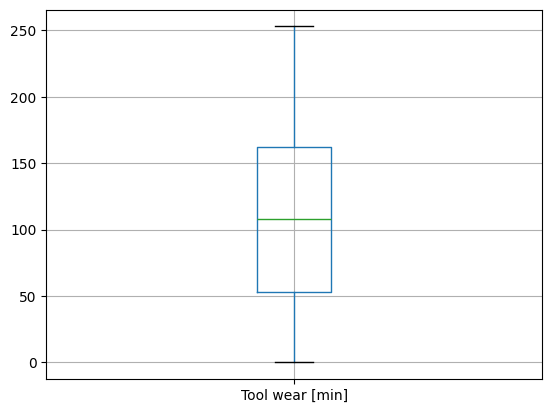

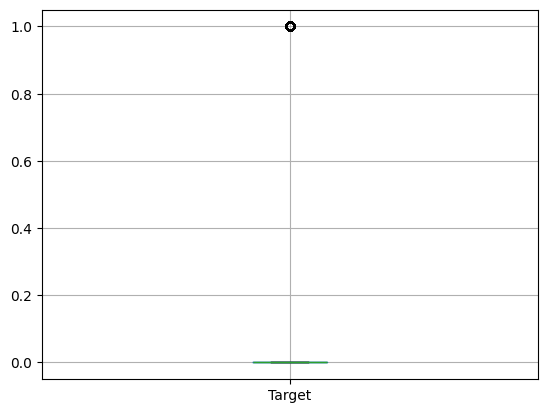

In [9]:
import matplotlib.pyplot as plt
for i in data.columns:
    if(data[i].dtype in ["int64","float64"]):
        data.boxplot(i)
        plt.show()  

In [10]:
Q1 = data["Rotational speed [rpm]"].quantile(0.25)
Q3 = data["Rotational speed [rpm]"].quantile(0.75)
iqr = Q3 - Q1
max = Q3 + (iqr * 1.5)
min = Q1 - (iqr * 1.5)

print(f"max is {max}")
print(f"min is {min}")

outlayerrpm = data[(data["Rotational speed [rpm]"] > max) | (data["Rotational speed [rpm]"] < min)]
data = data[(data["Rotational speed [rpm]"] <= max) & (data["Rotational speed [rpm]"] >= min)]

print(f"shape of outlayerrpm: {outlayerrpm.shape}")
print(f"shape of data: {data.shape}")


max is 1895.5
min is 1139.5
shape of outlayerrpm: (418, 8)
shape of data: (9582, 8)


In [11]:
Q1=data["Torque [Nm]"].quantile(0.25)
Q3=data["Torque [Nm]"].quantile(0.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is{max}")
print(f"min is{min}")
outlayerNm = data[(data["Torque [Nm]"] > max) | (data["Torque [Nm]"] < min)]

data=data[(data["Torque [Nm]"]<=max) & (data["Torque [Nm]"]>=min)]
print(f"shape of outlayerNm :{outlayerNm.shape}")
print(f"shape of data :{data.shape}")

max is66.45
min is14.850000000000005
shape of outlayerNm :(47, 8)
shape of data :(9535, 8)


In [12]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M14860,M,298.1,308.6,1551,42.8,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0
2,L47182,L,298.1,308.5,1498,49.4,5,0
3,L47183,L,298.2,308.6,1433,39.5,7,0
4,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0
9996,H39410,H,298.9,308.4,1632,31.8,17,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0
9998,H39412,H,299.0,308.7,1408,48.5,25,0


# Check Number Of Unique Value

In [13]:
for i in data.columns:
    if(data[i].dtype=="object"):
        print(i)
        print(len(data[i].unique()))

Product ID
9535
Type
3


# Feature Selection 2

In [14]:
data.drop("Product ID",inplace=True,axis=1)

In [15]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


# Check Balance In Category In TYPE

In [16]:
data["Type"].value_counts()

Type
L    5713
M    2859
H     963
Name: count, dtype: int64

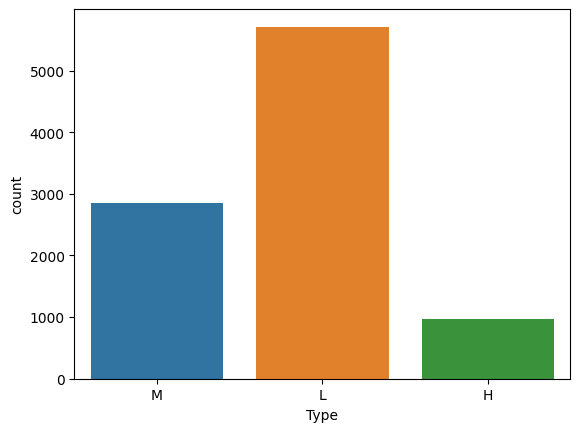

In [17]:
import seaborn as sns
sns.countplot(x="Type",data=data)
plt.show()

In [18]:
##not balanced

# Use RandomOverSampler To Balance TYPE

In [19]:
from imblearn.over_sampling import RandomOverSampler
X = data.drop("Type", axis=1)
y = data["Type"]
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
print(balanced_data["Type"].value_counts())

Type
M    5713
L    5713
H    5713
Name: count, dtype: int64


C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [20]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type
0,298.1,308.6,1551,42.8,0,0,M
1,298.2,308.7,1408,46.3,3,0,L
2,298.1,308.5,1498,49.4,5,0,L
3,298.2,308.6,1433,39.5,7,0,L
4,298.2,308.7,1408,40.0,9,0,L
...,...,...,...,...,...,...,...
17134,301.8,310.7,1383,45.7,44,0,M
17135,303.5,312.0,1475,42.9,85,0,M
17136,300.9,310.7,1696,27.3,76,0,M
17137,297.6,308.9,1479,38.1,182,0,M


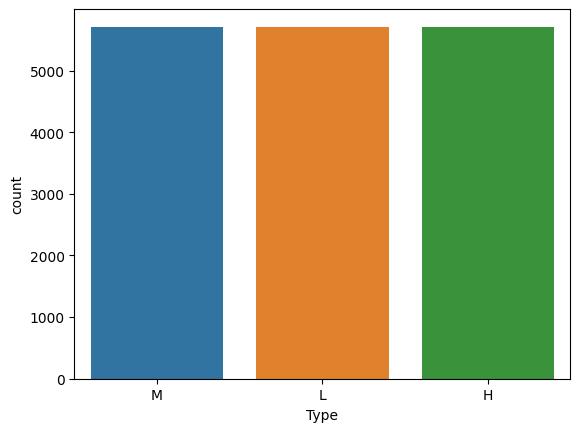

In [21]:
sns.countplot(x="Type",data=balanced_data)
plt.show()

# Encoding By Ordinal Encoder

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
balanced_data['Type_encoded'] = encoder.fit_transform(balanced_data[['Type']])
print(balanced_data[['Type', 'Type_encoded']])

      Type  Type_encoded
0        M           1.0
1        L           0.0
2        L           0.0
3        L           0.0
4        L           0.0
...    ...           ...
17134    M           1.0
17135    M           1.0
17136    M           1.0
17137    M           1.0
17138    M           1.0

[17139 rows x 2 columns]


In [23]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type,Type_encoded
0,298.1,308.6,1551,42.8,0,0,M,1.0
1,298.2,308.7,1408,46.3,3,0,L,0.0
2,298.1,308.5,1498,49.4,5,0,L,0.0
3,298.2,308.6,1433,39.5,7,0,L,0.0
4,298.2,308.7,1408,40.0,9,0,L,0.0
...,...,...,...,...,...,...,...,...
17134,301.8,310.7,1383,45.7,44,0,M,1.0
17135,303.5,312.0,1475,42.9,85,0,M,1.0
17136,300.9,310.7,1696,27.3,76,0,M,1.0
17137,297.6,308.9,1479,38.1,182,0,M,1.0


In [24]:
balanced_data.drop("Type",inplace=True,axis=1)

In [25]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...
17134,301.8,310.7,1383,45.7,44,0,1.0
17135,303.5,312.0,1475,42.9,85,0,1.0
17136,300.9,310.7,1696,27.3,76,0,1.0
17137,297.6,308.9,1479,38.1,182,0,1.0


In [26]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17139 entries, 0 to 17138
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      17139 non-null  float64
 1   Process temperature [K]  17139 non-null  float64
 2   Rotational speed [rpm]   17139 non-null  int64  
 3   Torque [Nm]              17139 non-null  float64
 4   Tool wear [min]          17139 non-null  int64  
 5   Target                   17139 non-null  int64  
 6   Type_encoded             17139 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 937.4 KB


# Check Correlation

In [27]:
balanced_data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
Air temperature [K],1.000000,0.874474,0.015056,-0.010303,0.001366,0.083793,-0.030057
Process temperature [K],0.874474,1.000000,0.016530,-0.013294,0.003848,0.030524,-0.021035
Rotational speed [rpm],0.015056,0.016530,1.000000,-0.894852,0.014384,-0.149422,0.007787
Torque [Nm],-0.010303,-0.013294,-0.894852,1.000000,-0.013695,0.192222,-0.012901
Tool wear [min],0.001366,0.003848,0.014384,-0.013695,1.000000,0.107956,-0.003322
Target,0.083793,0.030524,-0.149422,0.192222,0.107956,1.000000,-0.039190
Type_encoded,-0.030057,-0.021035,0.007787,-0.012901,-0.003322,-0.039190,1.000000


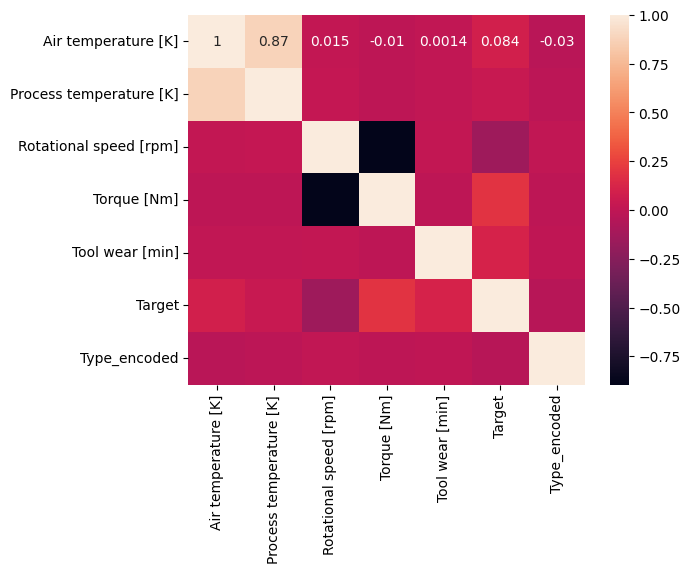

In [28]:
import seaborn as sns 
sns.heatmap(balanced_data.corr(), annot=True)
plt.show()

# Split X,Y

In [29]:
X=balanced_data.drop(["Target"],inplace=False,axis=1)
y=balanced_data["Target"]

# Check Balance In Target

In [30]:
balanced_data["Target"].value_counts()

Target
0    16737
1      402
Name: count, dtype: int64

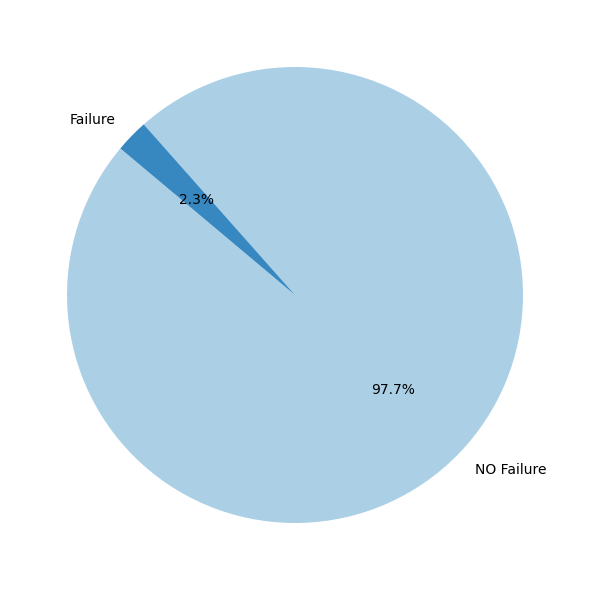

In [31]:
counts = balanced_data['Target'].value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(10, 6))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["NO Failure", "Failure"])
plt.tight_layout()
plt.show()

In [32]:
## notbalanced

# Use Smote To Balabce Target

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X, y)

C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [35]:
y.value_counts() 

Target
0    16737
1    16737
Name: count, dtype: int64

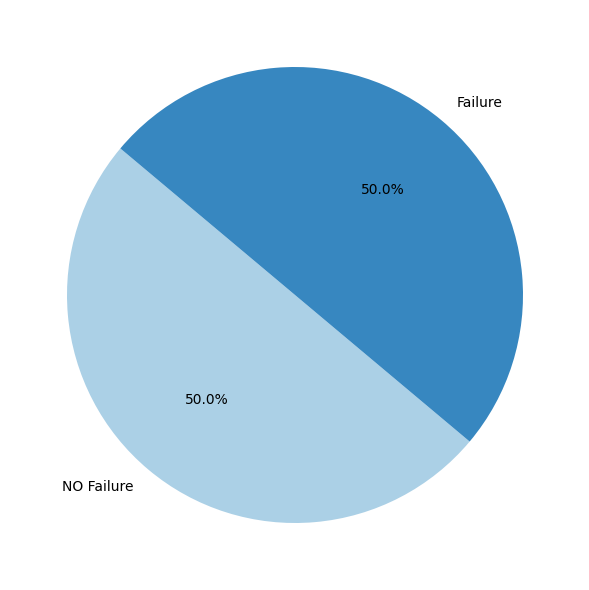

In [36]:
counts = y.value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(10, 6))

plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["NO Failure", "Failure"])
plt.tight_layout()
plt.show()


# Feature Selection 3 By SelectPercentile

In [37]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 

In [38]:
FeatureSelection = SelectPercentile(score_func = chi2, percentile=80)
X = FeatureSelection.fit_transform(X, y)

In [39]:
pd.DataFrame(X)

,0,1,2,3
0,1551.0,42.800000,0.0,1.000000
1,1408.0,46.300000,3.0,0.000000
2,1498.0,49.400000,5.0,0.000000
3,1433.0,39.500000,7.0,0.000000
4,1408.0,40.000000,9.0,0.000000
...,...,...,...,...
33469,1325.0,61.465017,90.0,0.283328
33470,1439.0,45.200000,40.0,2.000000
33471,1373.0,56.324558,202.0,0.000000
33472,1326.0,58.851372,89.0,0.886987


In [40]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...
17134,301.8,310.7,1383,45.7,44,0,1.0
17135,303.5,312.0,1475,42.9,85,0,1.0
17136,300.9,310.7,1696,27.3,76,0,1.0
17137,297.6,308.9,1479,38.1,182,0,1.0


# Split The Data Train And Test

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle=True)

print('X_train shape is ', X_train.shape)
print('X_test shape is ', X_test.shape)
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)


X_train shape is  (26779, 4)
X_test shape is  (6695, 4)
y_train shape is  (26779,)
y_test shape is  (6695,)


# Train Model By Use Gridsearchcv

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RandomForestClassifierModel = RandomForestClassifier(random_state=33)
param_grid = {
    'n_estimators': [50, 100, 200],   
    'max_depth': [None, 5, 10, 20],   
    'criterion': ['gini', 'entropy'],   
}
grid_search = GridSearchCV(estimator=RandomForestClassifierModel, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=33)

# Evaluation

In [44]:
from sklearn.metrics import classification_report

In [60]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       1.00      0.98      0.99      3311
           1       0.98      1.00      0.99      3388

    accuracy                           0.99      6699
   macro avg       0.99      0.99      0.99      6699
weighted avg       0.99      0.99      0.99      6699



# Train Model By Use Gridsearchcv

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [3, 4, 5], 
}
GBCModel = GradientBoostingClassifier(random_state=33)
grid_search = GridSearchCV(estimator=GBCModel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'max_depth': 5, 'n_estimators': 150}


GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=33)

# Evaluation

In [48]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       0.99      0.96      0.97      3311
           1       0.96      0.99      0.97      3388

    accuracy                           0.97      6699
   macro avg       0.97      0.97      0.97      6699
weighted avg       0.97      0.97      0.97      6699



# Train Model By Use Gridsearchcv

In [49]:

from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20]
}
dtcModel = DecisionTreeClassifier(random_state=33)
grid_search = GridSearchCV(estimator=dtcModel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', random_state=33)

# Evaluation

In [50]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       0.99      0.98      0.99      3311
           1       0.98      0.99      0.99      3388

    accuracy                           0.99      6699
   macro avg       0.99      0.99      0.99      6699
weighted avg       0.99      0.99      0.99      6699



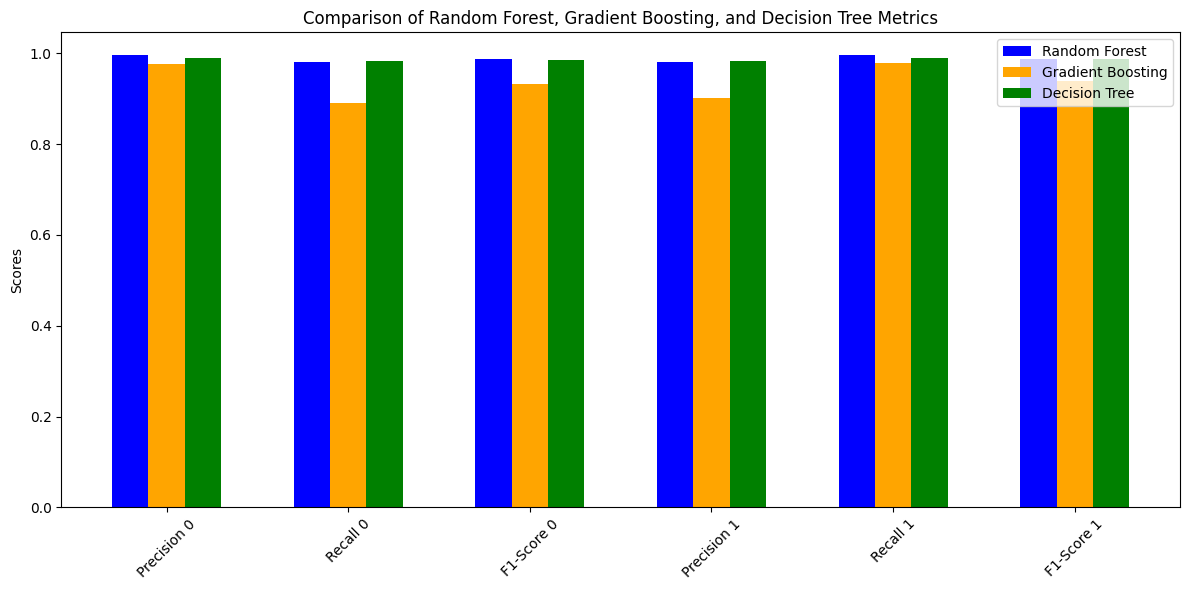

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


rfc = RandomForestClassifier(random_state=33)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)

gbc = GradientBoostingClassifier(random_state=33)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
report_gbc = classification_report(y_test, y_pred_gbc, output_dict=True)


dtc = DecisionTreeClassifier(random_state=33)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True)


metrics = ['precision', 'recall', 'f1-score']


rfc_metrics = [report_rfc['0'][metric] for metric in metrics] + [report_rfc['1'][metric] for metric in metrics]
gbc_metrics = [report_gbc['0'][metric] for metric in metrics] + [report_gbc['1'][metric] for metric in metrics]
dtc_metrics = [report_dtc['0'][metric] for metric in metrics] + [report_dtc['1'][metric] for metric in metrics]


labels = ['Precision 0', 'Recall 0', 'F1-Score 0', 'Precision 1', 'Recall 1', 'F1-Score 1']

x = range(len(labels))

plt.figure(figsize=(12, 6))


plt.bar([i - 0.2 for i in x], rfc_metrics, width=0.2, label='Random Forest', color='blue')
plt.bar(x, gbc_metrics, width=0.2, label='Gradient Boosting', color='orange')
plt.bar([i + 0.2 for i in x], dtc_metrics, width=0.2, label='Decision Tree', color='green')

plt.title('Comparison of Random Forest, Gradient Boosting, and Decision Tree Metrics')
plt.xticks(x, labels, rotation=45)
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


In [62]:
input_data = np.array([[1307.14, 43.94, 127.08, 1]])  
prediction = best_model.predict_proba(input_data)

probability_failure = prediction[0][1]  
if probability_failure > 0.5:
    label = f"failure {probability_failure:.2f}"
else:
    label = f"no failure {1 - probability_failure:.2f}"

print(f"Prediction: {probability_failure}")
print(label)


Prediction: 0.04
no failure 0.96


In [67]:
input_data= np.array([[1307.14, 643.94, 127.08, 1]])  
prediction = best_model.predict_proba(input_data)


probability_failure = prediction[0][1] 
if probability_failure > 0.5:
    label = f"failure {probability_failure:.2f}"
else:
    label = f"no failure {1 - probability_failure:.2f}"

print(f"Prediction: {probability_failure}")
print(label)


Prediction: 0.34
no failure 0.66


In [68]:
input_data = np.array([[10700.14, 543.94, 127.98, 1]])  
prediction = best_model.predict_proba(input_data)

probability_failure = prediction[0][1]  

if probability_failure > 0.5:
    label = f"failure {probability_failure:.2f}"
else:
    label = f"no failure {1 - probability_failure:.2f}"

print(f"Prediction: {probability_failure}")
print(label)

Prediction: 0.82
failure 0.82
